In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [160]:
df=pd.read_csv('Bengaluru_House_Data.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [162]:
df.shape

(13320, 9)

In [163]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [164]:
for column in df.columns:
    print(column," :",df[column].unique())

area_type  : ['Super built-up  Area' 'Plot  Area' 'Built-up  Area' 'Carpet  Area']
availability  : ['19-Dec' 'Ready To Move' '18-May' '18-Feb' '18-Nov' '20-Dec' '17-Oct'
 '21-Dec' '19-Sep' '20-Sep' '18-Mar' '20-Feb' '18-Apr' '20-Aug' '18-Oct'
 '19-Mar' '17-Sep' '18-Dec' '17-Aug' '19-Apr' '18-Jun' '22-Dec' '22-Jan'
 '18-Aug' '19-Jan' '17-Jul' '18-Jul' '21-Jun' '20-May' '19-Aug' '18-Sep'
 '17-May' '17-Jun' '21-May' '18-Jan' '20-Mar' '17-Dec' '16-Mar' '19-Jun'
 '22-Jun' '19-Jul' '21-Feb' 'Immediate Possession' '19-May' '17-Nov'
 '20-Oct' '20-Jun' '19-Feb' '21-Oct' '21-Jan' '17-Mar' '17-Apr' '22-May'
 '19-Oct' '21-Jul' '21-Nov' '21-Mar' '16-Dec' '22-Mar' '20-Jan' '21-Sep'
 '21-Aug' '14-Nov' '19-Nov' '15-Nov' '16-Jul' '15-Jun' '17-Feb' '20-Nov'
 '20-Jul' '16-Sep' '15-Oct' '15-Dec' '16-Oct' '22-Nov' '15-Aug' '17-Jan'
 '16-Nov' '20-Apr' '16-Jan' '14-Jul']
location  : ['Electronic City Phase II' 'Chikka Tirupathi' 'Uttarahalli' ...
 '12th cross srinivas nagar banshankari 3rd stage' 'Havanur ex

In [165]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [166]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

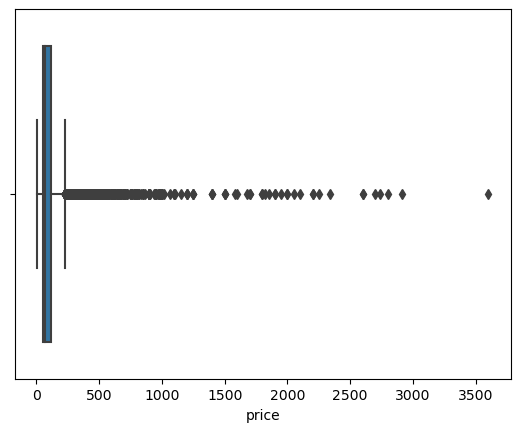

In [167]:
import seaborn as sns
sns.boxplot(df.price)

In [168]:
df1=df.dropna(subset=['size'])

In [169]:
df1['BHK']=df1['size'].apply(lambda x: int(x.split(' ')[0]))

C:\Users\dsca\AppData\Local\Temp\ipykernel_984\490329464.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['BHK']=df1['size'].apply(lambda x: int(x.split(' ')[0]))


In [170]:
df1.BHK.unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [171]:
df.bath.value_counts()

2.0     6908
3.0     3286
4.0     1226
1.0      788
5.0      524
6.0      273
7.0      102
8.0       64
9.0       43
10.0      13
12.0       7
13.0       3
11.0       3
16.0       2
27.0       1
40.0       1
15.0       1
14.0       1
18.0       1
Name: bath, dtype: int64

In [172]:
df2=df1[(df1.BHK<=9) & (df1.bath<=8)]

In [173]:
df2.BHK.unique()

array([2, 4, 3, 6, 1, 8, 7, 5, 9], dtype=int64)

In [174]:
df2.isnull().sum()

area_type          0
availability       0
location           1
size               0
society         5427
total_sqft         0
bath               0
balcony          498
price              0
BHK                0
dtype: int64

#### Removing outliers

In [175]:
df2.balcony.mode()

0    2.0
Name: balcony, dtype: float64

In [176]:
df2.balcony.value_counts()

2.0    5106
1.0    4892
3.0    1653
0.0    1018
Name: balcony, dtype: int64

In [177]:
q=pd.crosstab(df2.balcony,df2.BHK)
q

BHK,1,2,3,4,5,6,7,8,9
balcony,,,,,,,,,
0.0,186,355,219,169,39,27,10,13,0
1.0,425,2735,1245,324,95,38,15,10,5
2.0,35,2062,2331,458,100,69,25,22,4
3.0,2,328,861,287,65,55,32,17,6


In [178]:
df2.loc[(df2['BHK']==1) & (df2['balcony'].isnull()),'balcony']=1
df2.loc[(df2['BHK']==2) & (df2['balcony'].isnull()),'balcony']=1
df2.loc[(df2['BHK']==3) & (df2['balcony'].isnull()),'balcony']=2
df2.loc[(df2['BHK']==4) & (df2['balcony'].isnull()),'balcony']=2
df2.loc[(df2['BHK']==3) & (df2['balcony'].isnull()),'balcony']=2

In [179]:
pd.crosstab(df2.balcony,df2.BHK)


BHK,1,2,3,4,5,6,7,8,9
balcony,,,,,,,,,
0.0,186,355,219,169,39,27,10,13,0
1.0,426,2782,1245,324,95,38,15,10,5
2.0,35,2062,2508,615,100,69,25,22,4
3.0,2,328,861,287,65,55,32,17,6


In [180]:
df2 = df2.replace(np.nan, None)

In [185]:
df2.balcony.fillna(3,inplace=True)

In [186]:
df2.isnull().sum()

area_type          0
availability       0
location           1
size               0
society         5427
total_sqft         0
bath               0
balcony            0
price              0
BHK                0
dtype: int64

In [187]:
df2.society.value_counts()

GrrvaGr    80
PrarePa    71
Sryalan    59
Prtates    58
GMown E    56
           ..
BDlexHo     1
Shine S     1
Pelle P     1
RRersow     1
RSntsAp     1
Name: society, Length: 2665, dtype: int64